# Importing packages

In [2]:
%load_ext autoreload
%autoreload 2

In [28]:
from multistream_algorithms.e_detectors import (
    ProblemType,
    MultiStreamAlgorithm,
    DetectorType,
    get_e_detector,
    get_declarations,
)
from multistream_algorithms.error_metrics import ErrorType, get_error_rate, get_mean_detection_curve

import matplotlib.pyplot as plt
import numpy as np

First, we change a few plotting settings.

In [4]:
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("svg") # so that inline plots look nice
plt.style.use("math.mplstyle")

# Gaussian mean change

## Detectors

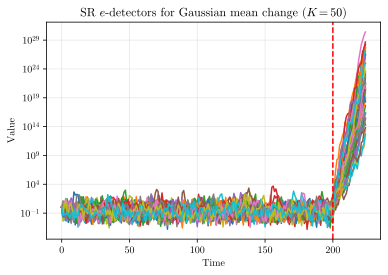

In [4]:
e_det = get_e_detector(
    ProblemType.mean_change,
    DetectorType.sr,
    timeseries_length=225,
    changepoint=200,
    n_streams=50,
)

plt.plot(e_det.T)

plt.xlabel("Time")
plt.ylabel("Value")
plt.yscale("log")

plt.axvline(x=200, color="red", linestyle="--")

plt.title("SR $e$-detectors for Gaussian mean change ($K = 50$)")

plt.savefig("../images/meanchange-detectors.pdf")

plt.show()

## FDR

In [5]:
fdr_edbh = get_error_rate(
    ErrorType.fdr,
    ProblemType.mean_change,
    DetectorType.sr,
    MultiStreamAlgorithm.edbh,
    n_sims=100,
    timeseries_length=200,
    changepoint=None,
    n_streams=1000,
    alpha=0.1,
)

fdr_naive = get_error_rate(
    ErrorType.fdr,
    ProblemType.mean_change,
    DetectorType.sr,
    MultiStreamAlgorithm.naive,
    n_sims=100,
    timeseries_length=200,
    changepoint=None,
    n_streams=1000,
    alpha=0.1,
)

100%|██████████| 100/100 [00:02<00:00, 37.13it/s]


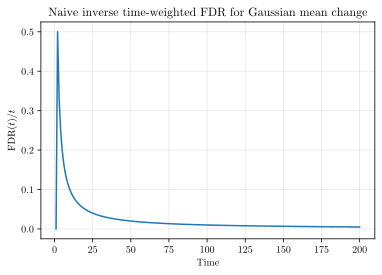

In [6]:
plt.plot(np.arange(1, len(fdr_naive) + 1), fdr_naive / np.arange(1, len(fdr_naive) + 1))

plt.xlabel("Time")
plt.ylabel("$\\mathrm{FDR}(t)/t$")

plt.title("Naive inverse time-weighted FDR for Gaussian mean change")

plt.savefig("../images/naive-tw-fdr-meanchange.pdf")

plt.show()

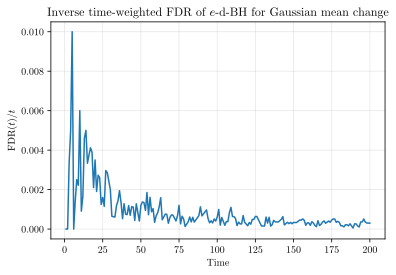

In [7]:
plt.plot(np.arange(1, len(fdr_edbh) + 1), fdr_edbh / np.arange(1, len(fdr_edbh) + 1))

plt.xlabel("Time")
plt.ylabel("$\\mathrm{FDR}(t)/t$")

plt.title("Inverse time-weighted FDR of $e$-d-BH for Gaussian mean change")

plt.savefig("../images/edbh-tw-fdr-meanchange.pdf")

plt.show()

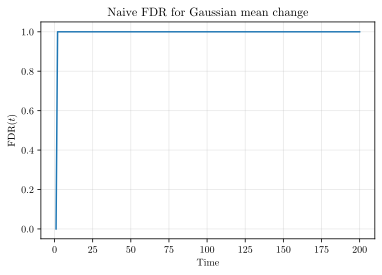

In [8]:
plt.plot(np.arange(1, len(fdr_naive) + 1), fdr_naive)

plt.xlabel("Time")

plt.ylabel("$\\mathrm{FDR}(t)$")

plt.title("Naive FDR for Gaussian mean change")

plt.savefig("../images/naive-fdr-meanchange.pdf")

plt.show()

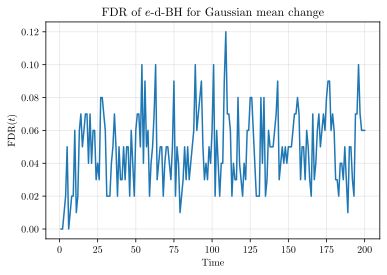

In [10]:
plt.plot(np.arange(1, len(fdr_edbh) + 1), fdr_edbh, label="$e$-d-BH")

plt.xlabel("Time")

plt.ylabel("$\\mathrm{FDR}(t)$")

plt.title("FDR of $e$-d-BH for Gaussian mean change")

plt.savefig("../images/edbh-fdr-meanchange.pdf")

plt.show()

## FWER

In [11]:
fwer_edholm = get_error_rate(
    ErrorType.fwer,
    ProblemType.mean_change,
    DetectorType.sr,
    MultiStreamAlgorithm.edholm,
    n_sims=100,
    timeseries_length=200,
    changepoint=None,
    n_streams=1000,
    alpha=0.1,
)

fwer_edbonf = get_error_rate(
    ErrorType.fwer,
    ProblemType.mean_change,
    DetectorType.sr,
    MultiStreamAlgorithm.edbonf,
    n_sims=100,
    timeseries_length=200,
    changepoint=None,
    n_streams=1000,
    alpha=0.1,
)

fwer_naive = get_error_rate(
    ErrorType.fwer,
    ProblemType.mean_change,
    DetectorType.sr,
    MultiStreamAlgorithm.naive,
    n_sims=100,
    timeseries_length=200,
    changepoint=None,
    n_streams=1000,
    alpha=0.1,
)

100%|██████████| 100/100 [00:02<00:00, 38.16it/s]


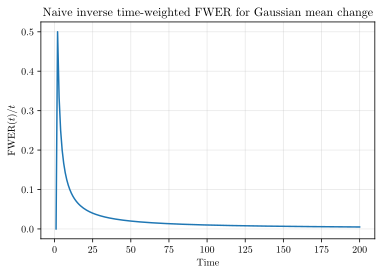

In [12]:
plt.plot(np.arange(1, len(fwer_naive) + 1), fwer_naive / np.arange(1, len(fwer_naive) + 1))

plt.xlabel("Time")
plt.ylabel("$\\mathrm{FWER}(t)/t$")

plt.title("Naive inverse time-weighted FWER for Gaussian mean change")

plt.savefig("../images/naive-tw-fwer-meanchange.pdf")

plt.show()

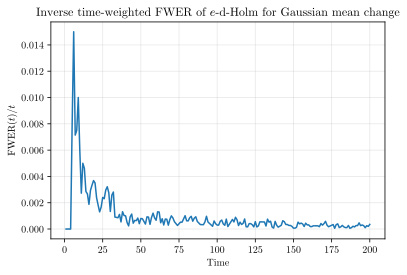

In [16]:
plt.plot(
    np.arange(1, len(fwer_edholm) + 1), fwer_edholm / np.arange(1, len(fwer_edholm) + 1)
)

plt.xlabel("Time")
plt.ylabel("$\\mathrm{FWER}(t)/t$")

plt.title("Inverse time-weighted FWER of $e$-d-Holm for Gaussian mean change")

plt.savefig("../images/edholm-tw-fwer-meanchange.pdf")

plt.show()

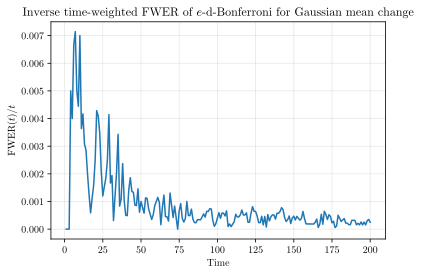

In [15]:
plt.plot(
    np.arange(1, len(fwer_edbonf) + 1), fwer_edbonf / np.arange(1, len(fwer_edbonf) + 1)
)

plt.xlabel("Time")
plt.ylabel("$\\mathrm{FWER}(t)/t$")

plt.title("Inverse time-weighted FWER of $e$-d-Bonferroni for Gaussian mean change")

plt.savefig("../images/edbonf-tw-fwer-meanchange.pdf")

plt.show()

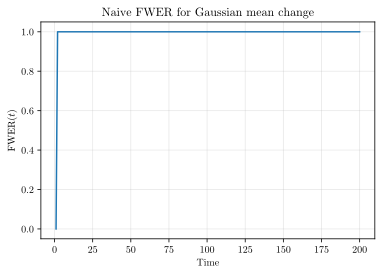

In [17]:
plt.plot(np.arange(1, len(fwer_naive) + 1), fwer_naive)

plt.xlabel("Time")

plt.ylabel("$\\mathrm{FWER}(t)$")

plt.title("Naive FWER for Gaussian mean change")

plt.savefig("../images/naive-fwer-meanchange.pdf")

plt.show()

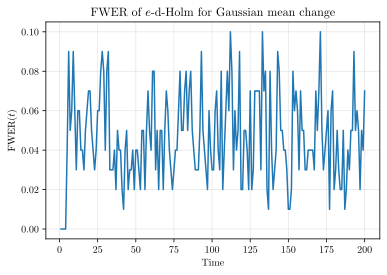

In [18]:
plt.plot(np.arange(1, len(fwer_edholm) + 1), fwer_edholm)

plt.xlabel("Time")

plt.ylabel("$\\mathrm{FWER}(t)$")

plt.title("FWER of $e$-d-Holm for Gaussian mean change")

plt.savefig("../images/edholm-fwer-meanchange.pdf")

plt.show()

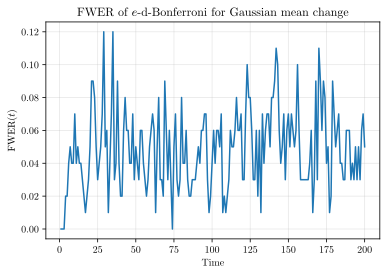

In [19]:
plt.plot(np.arange(1, len(fwer_edbonf) + 1), fwer_edbonf)

plt.xlabel("Time")

plt.ylabel("$\\mathrm{FWER}(t)$")

plt.title("FWER of $e$-d-Bonferroni for Gaussian mean change")

plt.savefig("../images/edbonf-fwer-meanchange.pdf")

plt.show()

## PFER

In [20]:
pfer_edbonf = get_error_rate(
    ErrorType.pfer,
    ProblemType.mean_change,
    DetectorType.sr,
    MultiStreamAlgorithm.edbonf,
    n_sims=100,
    timeseries_length=200,
    changepoint=None,
    n_streams=1000,
    alpha=10.,
)

pfer_naive = get_error_rate(
    ErrorType.pfer,
    ProblemType.mean_change,
    DetectorType.sr,
    MultiStreamAlgorithm.naive,
    n_sims=100,
    timeseries_length=200,
    changepoint=None,
    n_streams=1000,
    alpha=10.,
)

100%|██████████| 100/100 [00:03<00:00, 33.02it/s]


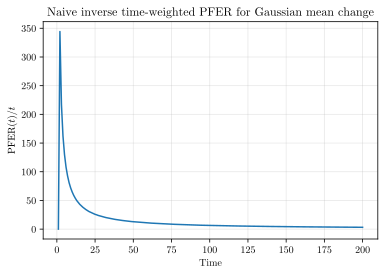

In [21]:
plt.plot(np.arange(1, len(pfer_naive) + 1), pfer_naive / np.arange(1, len(pfer_naive) + 1))

plt.xlabel("Time")
plt.ylabel("$\\mathrm{PFER}(t)/t$")

plt.title("Naive inverse time-weighted PFER for Gaussian mean change")

plt.savefig("../images/naive-tw-pfer-meanchange.pdf")

plt.show()

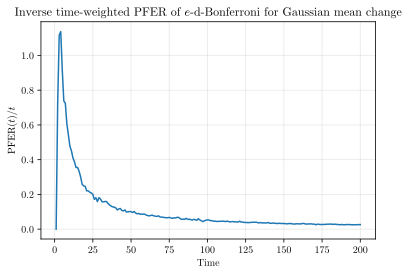

In [22]:
plt.plot(
    np.arange(1, len(pfer_edbonf) + 1), pfer_edbonf / np.arange(1, len(pfer_edbonf) + 1)
)

plt.xlabel("Time")
plt.ylabel("$\\mathrm{PFER}(t)/t$")

plt.title("Inverse time-weighted PFER of $e$-d-Bonferroni for Gaussian mean change")

plt.savefig("../images/edbonf-tw-pfer-meanchange.pdf")

plt.show()

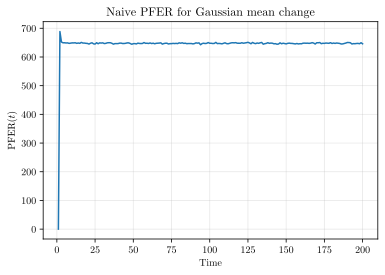

In [23]:
plt.plot(np.arange(1, len(pfer_naive) + 1), pfer_naive)

plt.xlabel("Time")

plt.ylabel("$\\mathrm{PFER}(t)$")

plt.title("Naive PFER for Gaussian mean change")

plt.savefig("../images/naive-pfer-meanchange.pdf")

plt.show()

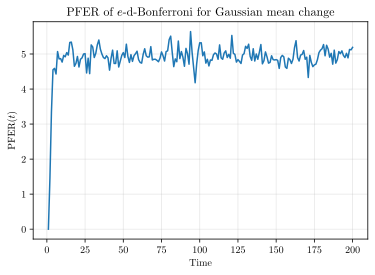

In [24]:
plt.plot(np.arange(1, len(pfer_edbonf) + 1), pfer_edbonf)

plt.xlabel("Time")

plt.ylabel("$\\mathrm{PFER}(t)$")

plt.title("PFER of $e$-d-Bonferroni for Gaussian mean change")

plt.savefig("../images/edbonf-pfer-meanchange.pdf")

plt.show()

## Mean detection curve

100%|██████████| 100/100 [00:04<00:00, 24.08it/s]


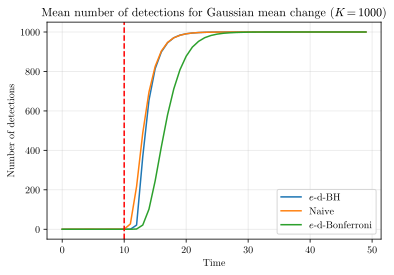

In [54]:
mean_detection_curves = get_mean_detection_curve(ProblemType.mean_change, DetectorType.sr, [MultiStreamAlgorithm.edbh, MultiStreamAlgorithm.edbonf, MultiStreamAlgorithm.naive], n_sims = 100, timeseries_length = 50, changepoint = 10, n_streams = 1000)

mean_detection_curve_edbh = mean_detection_curves[0, :]
mean_detection_curve_edbonf = mean_detection_curves[1, :]
mean_detection_curve_naive = mean_detection_curves[2, :]

plt.plot(mean_detection_curve_edbh, label="$e$-d-BH")
plt.plot(mean_detection_curve_naive, label="Naive")
plt.plot(mean_detection_curve_edbonf, label="$e$-d-Bonferroni")

plt.xlabel("Time")
plt.ylabel("Number of detections")

plt.axvline(x=10, color="red", linestyle="--")

plt.legend(loc="lower right")

plt.title("Mean number of detections for Gaussian mean change ($K = 1000$)")

plt.savefig("../images/meandetections-meanchange.pdf")

plt.show()

## Signal strength

In [ ]:
for n in range(-3, 3):
    signal_strength = 2 ** (-n)

    mean_detection_curves = get_mean_detection_curve(
        ProblemType.mean_change,
        DetectorType.sr,
        [MultiStreamAlgorithm.edbh, MultiStreamAlgorithm.edbonf, MultiStreamAlgorithm.naive],
        n_sims=100,
        timeseries_length=50,
        changepoint=10,
        n_streams=1000,
        signal_strength=signal_strength,
    )

    mean_detection_curve_edbh = mean_detection_curves[0, :]
    mean_detection_curve_edbonf = mean_detection_curves[1, :]
    mean_detection_curve_naive = mean_detection_curves[2, :]
    
    plt.plot(mean_detection_curve_edbh, label="$e$-d-BH")
    plt.plot(mean_detection_curve_naive, label="Naive")
    plt.plot(mean_detection_curve_edbonf, label="$e$-d-Bonferroni")

    plt.xlabel("Time")
    plt.ylabel("Number of detections")

    plt.axvline(x=10, color="red", linestyle="--")

    plt.legend(loc="lower right")

    plt.title(f"Mean number of detections for Gaussian mean change ($\\delta = {signal_strength}$)")

    plt.savefig(f"../images/meandetections-meanchange-ss-{signal_strength}.pdf")
    plt.clf()

# Symmetry change

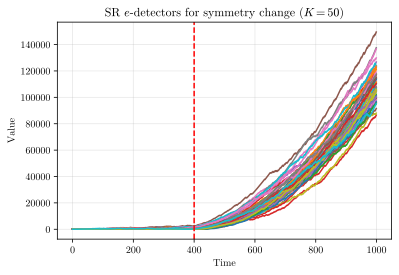

In [27]:
e_det = get_e_detector(
    ProblemType.symmetry,
    DetectorType.sr,
    timeseries_length=1000,
    changepoint=400,
    n_streams=50,
)

plt.plot(e_det.T)

plt.xlabel("Time")
plt.ylabel("Value")

plt.axvline(x=400, color="red", linestyle="--")

plt.title("SR $e$-detectors for symmetry change ($K = 50$)")

plt.savefig("../images/symmetry-detectors.pdf")

plt.show()

100%|██████████| 50/50 [00:44<00:00,  1.12it/s]


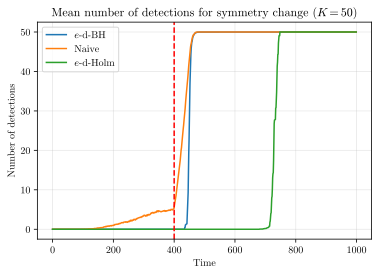

In [36]:
mean_detection_curves = get_mean_detection_curve(
    ProblemType.symmetry,
    DetectorType.sr,
    [MultiStreamAlgorithm.edbh, MultiStreamAlgorithm.edholm, MultiStreamAlgorithm.naive],
    n_sims=50,
    timeseries_length=1000,
    changepoint=400,
    n_streams=50,
)

mean_detection_curve_edbh = mean_detection_curves[0, :]
mean_detection_curve_edholm = mean_detection_curves[1, :]
mean_detection_curve_naive = mean_detection_curves[2, :]

plt.plot(mean_detection_curve_edbh, label="$e$-d-BH")
plt.plot(mean_detection_curve_naive, label="Naive")
plt.plot(mean_detection_curve_edholm, label="$e$-d-Holm")

plt.xlabel("Time")
plt.ylabel("Number of detections")

plt.axvline(x=400, color="red", linestyle="--")

plt.legend()

plt.title("Mean number of detections for symmetry change ($K = 50$)")

plt.savefig("../images/meandetections-symmetry.pdf")

plt.show()

# Independence change

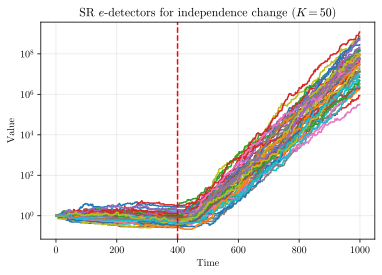

In [29]:
e_det = get_e_detector(
    ProblemType.independence,
    DetectorType.sr,
    timeseries_length=1000,
    changepoint=400,
    n_streams=50,
)

plt.plot(e_det.T)

plt.yscale("log")

plt.xlabel("Time")
plt.ylabel("Value")

plt.axvline(x=400, color="red", linestyle="--")

plt.title("SR $e$-detectors for independence change ($K = 50$)")

plt.savefig("../images/independence-detectors.pdf")

plt.show()

100%|██████████| 5/5 [07:20<00:00, 88.06s/it]


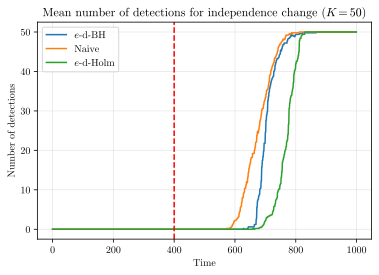

In [53]:
mean_detection_curves = get_mean_detection_curve(
    ProblemType.independence,
    DetectorType.sr,
    [MultiStreamAlgorithm.edbh, MultiStreamAlgorithm.edholm, MultiStreamAlgorithm.naive],
    n_sims=5,
    timeseries_length=1000,
    changepoint=400,
    n_streams=50,
)

mean_detection_curve_edbh = mean_detection_curves[0, :]
mean_detection_curve_edholm = mean_detection_curves[1, :]
mean_detection_curve_naive = mean_detection_curves[2, :]

plt.plot(mean_detection_curve_edbh, label="$e$-d-BH")
plt.plot(mean_detection_curve_naive, label="Naive")
plt.plot(mean_detection_curve_edholm, label="$e$-d-Holm")

plt.xlabel("Time")
plt.ylabel("Number of detections")

plt.axvline(x=400, color="red", linestyle="--")

plt.legend()

plt.title("Mean number of detections for independence change ($K = 50$)")

plt.savefig("../images/meandetections-independence.pdf")

plt.show()

# Subset of streams changing

In [52]:
signal_strength = 0.1

mean_detection_curves = get_mean_detection_curve(
    ProblemType.mean_change,
    DetectorType.sr,
    [MultiStreamAlgorithm.edbh, MultiStreamAlgorithm.edbonf, MultiStreamAlgorithm.naive],
    n_sims=5,
    timeseries_length=1000,
    changepoint=[400] * 100 + [None] * 900,
    n_streams=1000,
    signal_strength=signal_strength,
)

mean_detection_curve_edbh = mean_detection_curves[0, :]
mean_detection_curve_edbonf = mean_detection_curves[1, :]
mean_detection_curve_naive = mean_detection_curves[2, :]

plt.plot(mean_detection_curve_edbh, label="$e$-d-BH")
plt.plot(mean_detection_curve_naive, label="Naive")
plt.plot(mean_detection_curve_edbonf, label="$e$-d-Bonferroni")

plt.xlabel("Time")
plt.ylabel("Number of detections")

plt.axvline(x=400, color="red", linestyle="--")

plt.legend(loc="lower right")

plt.title(
    f"Mean number of detections for Gaussian mean change (100 changes)"
)

plt.savefig(f"../images/meandetections-meanchange-subset-ss-{signal_strength}.pdf")
plt.clf()

100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


<Figure size 432x288 with 0 Axes>

100%|██████████| 50/50 [00:42<00:00,  1.19it/s]


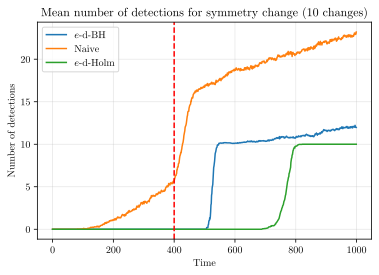

In [51]:
mean_detection_curves = get_mean_detection_curve(
    ProblemType.symmetry,
    DetectorType.sr,
    [MultiStreamAlgorithm.edbh, MultiStreamAlgorithm.edholm, MultiStreamAlgorithm.naive],
    n_sims=50,
    timeseries_length=1000,
    changepoint=[400] * 10 + [None] * 40,
    n_streams=50,
)

mean_detection_curve_edbh = mean_detection_curves[0, :]
mean_detection_curve_edholm = mean_detection_curves[1, :]
mean_detection_curve_naive = mean_detection_curves[2, :]

plt.plot(mean_detection_curve_edbh, label="$e$-d-BH")
plt.plot(mean_detection_curve_naive, label="Naive")
plt.plot(mean_detection_curve_edholm, label="$e$-d-Holm")

plt.xlabel("Time")
plt.ylabel("Number of detections")

plt.axvline(x=400, color="red", linestyle="--")

plt.legend()

plt.title("Mean number of detections for symmetry change (10 changes)")

plt.savefig("../images/meandetections-subset-symmetry.pdf")

plt.show()

100%|██████████| 5/5 [07:25<00:00, 89.15s/it]


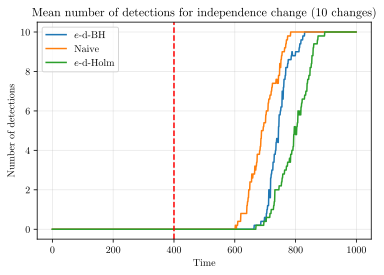

In [50]:
mean_detection_curves = get_mean_detection_curve(
    ProblemType.independence,
    DetectorType.sr,
    [MultiStreamAlgorithm.edbh, MultiStreamAlgorithm.edholm, MultiStreamAlgorithm.naive],
    n_sims=5,
    timeseries_length=1000,
    changepoint=[400] * 10 + [None] * 40,
    n_streams=50,
)

mean_detection_curve_edbh = mean_detection_curves[0, :]
mean_detection_curve_edholm = mean_detection_curves[1, :]
mean_detection_curve_naive = mean_detection_curves[2, :]

plt.plot(mean_detection_curve_edbh, label="$e$-d-BH")
plt.plot(mean_detection_curve_naive, label="Naive")
plt.plot(mean_detection_curve_edholm, label="$e$-d-Holm")

plt.xlabel("Time")
plt.ylabel("Number of detections")

plt.axvline(x=400, color="red", linestyle="--")

plt.legend()

plt.title("Mean number of detections for independence change (10 changes)")

plt.savefig("../images/meandetections-subset-independence.pdf")

plt.show()

# Conformal exchangeability detection

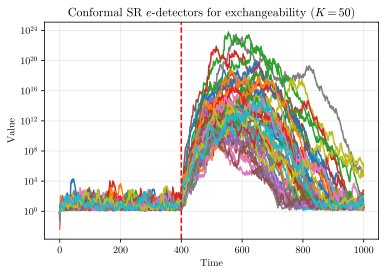

In [40]:
e_det = get_e_detector(
    ProblemType.conformal,
    DetectorType.sr,
    timeseries_length=1000,
    changepoint=400,
    n_streams=50,
)

plt.plot(e_det.T)
plt.yscale("log")

plt.title("Conformal SR $e$-detectors for exchangeability ($K = 50$)")

plt.xlabel("Time")
plt.ylabel("Value")

plt.axvline(x=400, color="red", linestyle="--")

plt.savefig("../images/conformal-detectors.pdf")
plt.show()

100%|██████████| 100/100 [02:52<00:00,  1.73s/it]


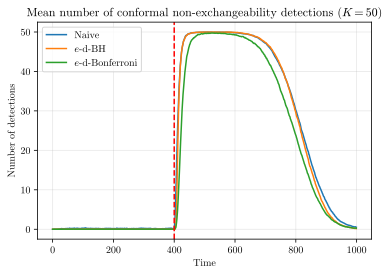

In [48]:
mean_detection_curves = get_mean_detection_curve(
    ProblemType.conformal,
    DetectorType.sr,
    [MultiStreamAlgorithm.naive, MultiStreamAlgorithm.edbh, MultiStreamAlgorithm.edbonf],
    n_sims=100,
    timeseries_length=1000,
    changepoint=400,
    n_streams=50,
)

mean_detection_curve_naive = mean_detection_curves[0, :]
mean_detection_curve_edbh = mean_detection_curves[1, :]
mean_detection_curve_edbonf = mean_detection_curves[2, :]

plt.plot(mean_detection_curve_naive, label="Naive")
plt.plot(mean_detection_curve_edbh, label="$e$-d-BH")
plt.plot(mean_detection_curve_edbonf, label="$e$-d-Bonferroni")

plt.xlabel("Time")
plt.ylabel("Number of detections")

plt.axvline(x=400, color="red", linestyle="--")

plt.legend()

plt.title("Mean number of conformal non-exchangeability detections ($K = 50$)")

plt.savefig("../images/meandetections-conformal.pdf")

plt.show()

# Miscellaneous

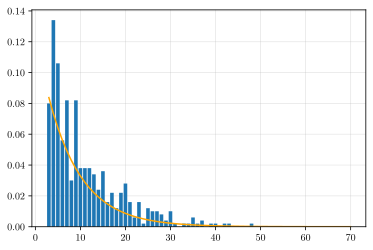

In [79]:
e_det = get_e_detector(
    ProblemType.symmetry,
    DetectorType.sr,
    timeseries_length=1000,
    changepoint=None,
    n_streams=500,
)

first_detections = []
for stream in e_det:
    first_detections.append(min(i for i, x in enumerate(stream) if x >= 10))

first_detections = np.array(first_detections)

p = 1 / (np.mean(first_detections + 1) - np.min(first_detections + 1))

labels, counts = np.unique(first_detections, return_counts=True)
plt.bar(labels, counts / 500, align="center")
plt.plot(np.arange(min(first_detections), 71), p * (1 - p) ** (np.arange(min(first_detections), 71)), c="orange")
plt.show()

In [61]:
p

np.float64(1.0845986984815619)

In [73]:
min(first_detections)

np.int64(3)

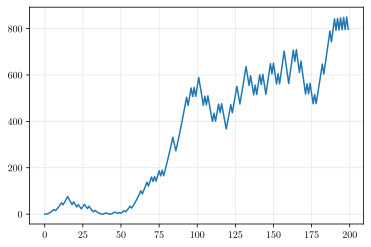

In [61]:
edet = get_e_detector(
    ProblemType.symmetry,
    DetectorType.sr,
    timeseries_length=200,
    changepoint=None,
    n_streams=1,
)

plt.plot(edet.T)

100%|██████████| 50/50 [00:14<00:00,  3.45it/s]


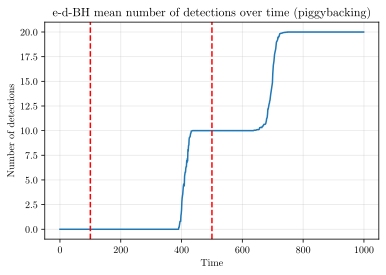

In [47]:
mean_detection_curve_edbh = get_mean_detection_curve(
    ProblemType.symmetry,
    DetectorType.sr,
    [MultiStreamAlgorithm.edbh],
    n_sims=50,
    alpha=0.0002,
    timeseries_length=1000,
    changepoint=[100] * 10 + [500] * 10 + [None] * 30,
    n_streams=50,
)[0]

plt.plot(mean_detection_curve_edbh, label="$e$-d-BH")

plt.xlabel("Time")
plt.ylabel("Number of detections")

plt.axvline(x=100, color="red", linestyle="--")
plt.axvline(x=500, color="red", linestyle="--")

plt.title("e-d-BH mean number of detections over time (piggybacking)")

plt.savefig("../images/meandetections-piggybacking-symmetry.pdf")

plt.show()

In [49]:
np.argmax(mean_detection_curve_edbh >= 10) - 100, np.argmax(mean_detection_curve_edbh >= 20) - 500

(np.int64(309), np.int64(-88))

100%|██████████| 5/5 [00:03<00:00,  1.61it/s]


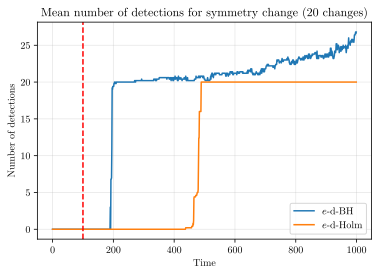

In [42]:
mean_detection_curves = get_mean_detection_curve(
    ProblemType.symmetry,
    DetectorType.sr,
    [MultiStreamAlgorithm.edbh, MultiStreamAlgorithm.edholm],
    n_sims=5,
    timeseries_length=1000,
    changepoint=[100] * 20 + [None] * 30,
    n_streams=50,
)

mean_detection_curve_edbh = mean_detection_curves[0, :]
mean_detection_curve_edholm = mean_detection_curves[1, :]

plt.plot(mean_detection_curve_edbh, label="$e$-d-BH")
plt.plot(mean_detection_curve_edholm, label="$e$-d-Holm")

plt.xlabel("Time")
plt.ylabel("Number of detections")

plt.axvline(x=100, color="red", linestyle="--")

plt.legend()

plt.title("Mean number of detections for symmetry change (20 changes)")

plt.savefig("../images/meandetections-multi-symmetry.pdf")

plt.show()